C:\Users\aishw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/20


C:\Users\aishw\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


844/844 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.7463 - loss: 0.7460 - val_accuracy: 0.9825 - val_loss: 0.0620
Epoch 2/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 28s 33ms/step - accuracy: 0.9546 - loss: 0.1484 - val_accuracy: 0.9872 - val_loss: 0.0445
Epoch 3/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9682 - loss: 0.1025 - val_accuracy: 0.9888 - val_loss: 0.0353
Epoch 4/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 30ms/step - accuracy: 0.9763 - loss: 0.0794 - val_accuracy: 0.9902 - val_loss: 0.0331
Epoch 5/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.9791 - loss: 0.0684 - val_accuracy: 0.9925 - val_loss: 0.0266
Epoch 6/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9818 - loss: 0.0594 - val_accuracy: 0.9915 - val_loss: 0.0338
Epoch 7/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.9816 - loss: 0.0590 - val_accuracy: 0.9912 - val_loss: 0.0328
Epoch 8/20
844/844 ━━━━━━━━━━━━━━━━━━━━ 25s 30ms/step - accuracy: 0.9839 - loss: 0.0529 - val_accurac

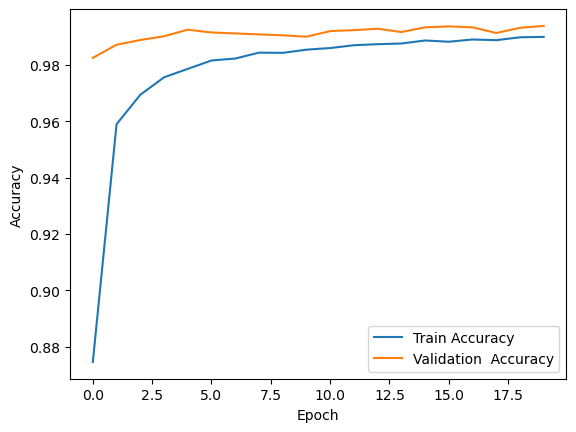

In [1]:
 #Design and implement CNN for image classification. 
#a) Select a suitable image classification dataset (medical engineering, agricultural, etc.). 
#b) Optimized with different hyper-parameters including learning rate, filter size, no. of layers, optimizers, dropouts, etc. 
 

import tensorflow as tf 
from tensorflow.keras import datasets, layers, models 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 
 

# Load and preprocess the MNIST dataset 
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0 
 

# Add channel dimension to the images 
train_images = train_images.reshape((60000, 28, 28, 1)) 
test_images = test_images.reshape((10000, 28, 28, 1)) 
 

# Split the dataset into training and validation sets 
train_images, val_images, train_labels, val_labels = train_test_split( train_images, train_labels, test_size=0.1, random_state=42 )
 

# Data augmentation for training images 
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1) 
datagen.fit(train_images) 
 

 # Create a CNN model with hyperparameter tuning and regularization 
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.Flatten()) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(10, activation='softmax')) 
 

# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 

# Train the model with data augmentation 
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),epochs=20, validation_data=(val_images, val_labels))
 

# Evaluate the model on the test set 
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"Test Accuracy: {test_acc}")
 

# Plot training history 
plt.plot(history.history['accuracy'],  label='Train Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation  Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend()
plt.show()